In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from functools import reduce

In [3]:
import h5py

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
path = 'E:/KNN/usps.h5'


with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]

In [6]:
X_tr[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18450001, 0.931     , 0.4165    ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00400001, 0.64849997, 1.        ,
       0.6535    , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.29500002, 1.        ,
       0.99300003, 0.2175    , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15849999, 0.9125    ,
       1.        , 0.781     , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03099999, 0.77      ,
       1.        , 0.889     , 0.14250001, 0.        , 0.     

In [7]:
y_tr.shape

(7291,)

In [8]:
X_te.shape

(2007, 256)

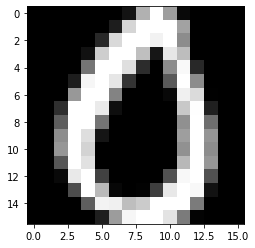

In [9]:
plt.imshow(X_tr[500].reshape([16, 16]), 'gray')

In [10]:
y_tr[500]

0

In [11]:
knn_clf = KNeighborsClassifier(n_neighbors = 1)
knn_clf.fit(X=X_tr, y=y_tr)

KNeighborsClassifier(n_neighbors=1)

In [12]:
predictions = knn_clf.predict(X=X_te)

In [13]:
accuracy_score(y_true=y_te, y_pred=predictions)

0.9436970602889886

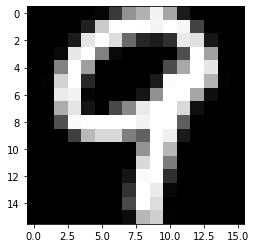

In [14]:
plt.imshow(X_te[0].reshape([16, 16]), 'gray')

In [15]:
predictions[0]

9

In [16]:
accuracy_score(y_true=y_te, y_pred=predictions)

0.9436970602889886

In [17]:
conf_mtrx = confusion_matrix(y_true=y_te, y_pred=predictions)
conf_mtrx

array([[355,   0,   2,   0,   0,   0,   0,   1,   0,   1],
       [  0, 255,   0,   0,   6,   0,   2,   1,   0,   0],
       [  6,   1, 183,   2,   1,   0,   0,   2,   3,   0],
       [  3,   0,   2, 154,   0,   5,   0,   0,   0,   2],
       [  0,   3,   1,   0, 182,   1,   2,   2,   1,   8],
       [  2,   1,   2,   4,   0, 145,   2,   0,   3,   1],
       [  0,   0,   1,   0,   2,   3, 164,   0,   0,   0],
       [  0,   1,   1,   1,   4,   0,   0, 139,   0,   1],
       [  5,   0,   1,   6,   1,   1,   0,   1, 148,   3],
       [  0,   0,   1,   0,   2,   0,   0,   4,   1, 169]])

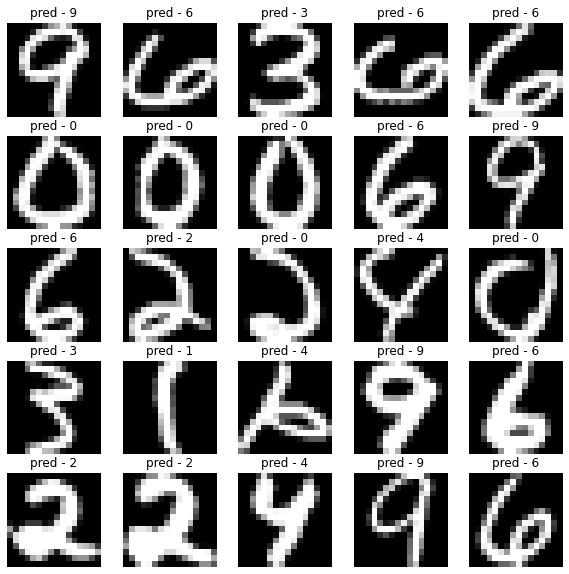

In [18]:
fig = plt.figure(figsize=(10, 10))
rows = 5
columns = 5
startIndex = 0

axes=[]
for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    pred = predictions[i+startIndex]
    plt.imshow(X_te[i].reshape([16, 16]), 'gray')
    plt.axis('off')
    plt.title("pred - " + str(pred))